In [ ]:
"""


A unit fraction contains 1 in the numerator. The decimal representation of the unit 
fractions with denominators 2 to 10 are given:

    1/2	= 	0.5
    1/3	= 	0.(3)
    1/4	= 	0.25
    1/5	= 	0.2
    1/6	= 	0.1(6)
    1/7	= 	0.(142857)
    1/8	= 	0.125
    1/9	= 	0.(1)
    1/10	= 	0.1 

Where 0.1(6) means 0.166666..., and has a 1-digit recurring cycle. It can be seen that 
1/7 has a 6-digit recurring cycle.

Find the value of d < 1000 for which 1/d contains the longest recurring cycle in its 
decimal fraction part.

"""

In [105]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
from decimal import Decimal, localcontext, getcontext, setcontext, Context

In [138]:
def unit_fraction(d):
    with localcontext() as ctx:
        ctx.prec = 10
        return Decimal(1) / Decimal(d)

In [139]:
for i in range(1, 11):
    print(f'1/{i} = {unit_fraction(i)}')

1/1 = 1
1/2 = 0.5
1/3 = 0.3333333333
1/4 = 0.25
1/5 = 0.2
1/6 = 0.1666666667
1/7 = 0.1428571429
1/8 = 0.125
1/9 = 0.1111111111
1/10 = 0.1


In [240]:
def tail_string(d):
    with localcontext() as ctx:
        ctx.prec = 100000
        d = Decimal(1) / Decimal(d)
        d = str(d)
        d = d[2:]
        d = [int(i) for i in list(d)]
        d = np.array(d)
        
        return d

In [265]:
tail = tail_string(983)[:-1]

In [266]:
len(tail)

100001

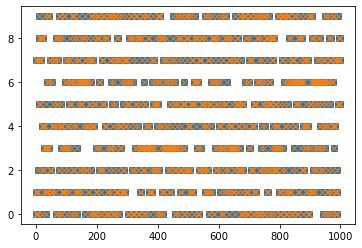

In [292]:
plt.plot(tail[10000:10000+1000], 's')
plt.plot(tail[10000+982:10000+1982], 'x')

In [243]:
def shift_by(tail, shift):
    return (tail[shift:] - tail[:-shift] == 0).all()

In [231]:
shift_by(tail, 2)

False

In [247]:
periods = []
periodic_ds = []
for d in range(2, 1001):
    tail = tail_string(d)[10000:-1]
    if len(tail) > 900:
        shift = 1
        while True:
            if shift_by(tail, shift):
                periods += [shift]
                periodic_ds += [d]
                break
            shift += 1
        

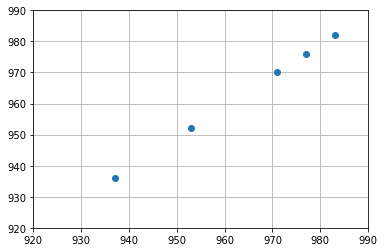

In [285]:
plt.plot(periodic_ds, periods, 'o')
plt.ylim(920, 990)
plt.xlim(920, 990)
plt.grid()

In [257]:
arr = np.array(periods)
arr_d = np.array(periodic_ds)

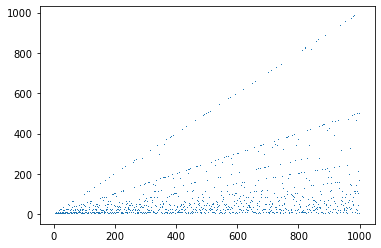

In [260]:
plt.plot(arr_d[arr < 1000], arr[arr < 1000], ',')

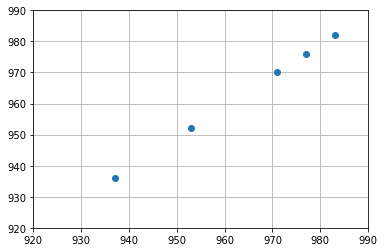

In [287]:
plt.plot(arr_d[arr < 1000], arr[arr < 1000], 'o')
plt.ylim(920, 990)
plt.xlim(920, 990)
plt.grid()

In [286]:
np.argmax(arr[arr < 1000])

928

In [264]:
arr_d[arr < 1000][928]

983

In [288]:
arr[arr < 1000][928]

982